In [ ]:
# from sklearn.preprocessing import LabelEncoder


# categorical_cols = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
#                     'education', 'ethnicity', 'job', 'location', 'smokes', 'religion', 'sign', 'pets']


# label_encoding_cols = ['education', 'ethnicity', 'job', 'location', 'sign']


# label_encoders = {}
# for col in label_encoding_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid NaN issues
#     label_encoders[col] = le  # Save the encoder in case you need to decode later


# df = pd.get_dummies(df, columns=[col for col in categorical_cols if col not in label_encoding_cols], drop_first=True)


# encoded_file_path = "okcupid_profiles_encoded.csv"  # Output file path
# df.to_csv(encoded_file_path, index=False)

# print(f"Dataset with encoding saved at: {encoded_file_path}")

# Amooora text data cleaning

## Import libraries and load csv

In [30]:
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt_tab')

In [2]:
!tree ..

..
├── notebooks
│   └── dedemenezes_exploratory.ipynb
├── raw_data
│   ├── okcupid_profiles.csv
│   ├── okcupid_profiles_encoded.csv
│   ├── parsed_data_public.csv
│   ├── question_data.csv
│   └── user_data_public.csv
├── README.md
└── requirements.txt

2 directories, 8 files


In [3]:
df = pd.read_csv('../raw_data/okcupid_profiles.csv')

In [4]:
df.shape

(59946, 31)

In [5]:
df.head(2)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN


## Access Text Dataset

In [6]:
df.iloc[:, :21]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has kids,has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,no,english
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,-1,entertainment / media,2012-06-29-11-01,"san francisco, california",doesn't have kids,likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,no,english (fluently)
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,100000,construction / craftsmanship,2012-06-27-23-37,"south san francisco, california",doesn't have kids,NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,no,english (fluently)
59944,27,single,m,straight,athletic,mostly anything,socially,often,working on college/university,"asian, black",...,-1,medicine / health,2012-06-23-13-01,"san francisco, california","doesn't have kids, but wants them",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ..."


In [7]:
text_df = df.iloc[:, 21:]

In [8]:
text_df.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Checking dataset

In [9]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   essay0  54458 non-null  object
 1   essay1  52374 non-null  object
 2   essay2  50308 non-null  object
 3   essay3  48470 non-null  object
 4   essay4  49409 non-null  object
 5   essay5  49096 non-null  object
 6   essay6  46175 non-null  object
 7   essay7  47495 non-null  object
 8   essay8  40721 non-null  object
 9   essay9  47343 non-null  object
dtypes: object(10)
memory usage: 4.6+ MB


### Duplicates

In [10]:
text_df.duplicated().sum()

np.int64(2134)

In [11]:
text_df[text_df.duplicated()]

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have `2134`duplicated observations all made of empty answers to all questions

In [12]:
# no_dup_df = text_df.drop_duplicates()
# no_dup_df.shape

### Empty values

In [13]:
text_df.isnull().sum().sort_values(ascending=False) / len(text_df) * 100

essay8    32.070530
essay6    22.972342
essay9    21.023922
essay7    20.770360
essay3    19.143896
essay5    18.099623
essay4    17.577486
essay2    16.077803
essay1    12.631368
essay0     9.154906
dtype: float64

In [14]:
text_df.dropna().shape

(29866, 10)

In [15]:
text_df.shape

(59946, 10)

Drop is not an option!

## % of answered questions

In [16]:
text_df.columns

Index(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9'],
      dtype='object')

In [17]:
text_df['not_answered_percent'] = text_df.apply(lambda x: x.isna().sum() / len(text_df.columns) * 100, axis=1)

In [18]:
text_df

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,not_answered_percent
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,0.0
1,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN,40.0
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",10.0
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,30.0
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...
59941,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...,0.0
59942,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.,0.0
59943,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies: bourne serie...",- iphone - friends and family - internet - bay...,"aside from work, how to improve my home.",out enjoying friendly conversation over dinner.,please let me think about this more.,we have similar interests.,0.0
59944,"""all i have in this world are my balls and my ...","following my dreams... ""you got a dream... you...",listening,it used to be the hair until i mowed it off bu...,where to begin musically: right now i listen t...,"music, family, friends, a basketball, hoop, so...",what can i do to make someone chuckle....,what i would do on any other day. everydays a ...,i like walking around in other people's house ...,you are interested and interesting...,0.0


## Replace NaN with empty string

In [19]:
no_nan_df = text_df.replace(np.nan, '')

In [20]:
no_nan_df.isna()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,not_answered_percent
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
59941,False,False,False,False,False,False,False,False,False,False,False
59942,False,False,False,False,False,False,False,False,False,False,False
59943,False,False,False,False,False,False,False,False,False,False,False
59944,False,False,False,False,False,False,False,False,False,False,False


## Combining into one big text column

In [21]:
no_nan_df['combined'] = no_nan_df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [22]:
no_nan_df.combined

0        about me:  i would love to think that i was so...
1        i am a chef: this is what that means. 1. i am ...
2        i'm not ashamed of much, but writing public te...
3        i work in a library and go to school. . . read...
4        hey how's it going? currently vague on the pro...
                               ...                        
59941    vibrant, expressive, caring optimist. i love b...
59942    i'm nick. i never know what to write about mys...
59943    hello! i enjoy traveling, watching movies, and...
59944    "all i have in this world are my balls and my ...
59945    is it odd that having a little "enemy" status ...
Name: combined, Length: 59946, dtype: object

## Cleaning text

In [23]:
def basic_cleaning(sentence):
    # Basic cleaning
    sentence = sentence.strip() # remove whitespaces
    sentence = sentence.lower() # lowercase
    sentence = ''.join(char for char in sentence if not char.isdigit()) # remove numbers
    
    # Advanced cleaning
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
        
    return sentence

In [42]:
cleaned_df = pd.DataFrame()

# Criar Novas colunas essayX_clean
essays = no_nan_df.columns[:10]
for essay in essays:
    cleaned_df[f"{essay}_clean"] = no_nan_df[essay].apply(basic_cleaning)

cleaned_df['combined_clean'] = no_nan_df.combined.apply(basic_cleaning)

cleaned_df

,essay0_clean,essay1_clean,essay2_clean,essay3_clean,essay4_clean,essay5_clean,essay6_clean,essay7_clean,essay8_clean,essay9_clean,combined_clean
0,about me i would love to think that i was som...,currently working as an international agent fo...,making people laugh ranting about a good salti...,the way i look i am a six foot half asian half...,books absurdistan the republic of mice and men...,food water cell phone shelter,duality and humorous things,trying to find someone to hang out with i am d...,i am new to california and looking for someone...,you want to be swept off your feet you are tir...,about me i would love to think that i was som...
1,i am a chef this is what that means i am a wo...,dedicating everyday to being an unbelievable b...,being silly having ridiculous amonts of fun wh...,,i am die hard christopher moore fan i dont rea...,delicious porkness in all of its glories my bi...,,,i am very open and will share just about anything,,i am a chef this is what that means i am a wo...
2,im not ashamed of much but writing public text...,i make nerdy software for musicians artists an...,improvising in different contexts alternating ...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,,viewing listening dancing talking drinking per...,when i was five years old i was known as the b...,you are bright open intense silly ironic criti...,im not ashamed of much but writing public text...
3,i work in a library and go to school,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,bataille celine beckett lynch jarmusch rw fa...,,cats and german philosophy,,,you feel so inclined,i work in a library and go to school reading...
4,hey hows it going currently vague on the profi...,work work work work play,creating imagery to look at httpbagsbrownblogs...,i smile a lot and my inquisitive nature,music bands rappers musicians at the moment th...,,,,,,hey hows it going currently vague on the profi...
...,...,...,...,...,...,...,...,...,...,...,...
59941,vibrant expressive caring optimist i love bein...,the happiest times have been when life came to...,i make an outstanding osso bucco i am also ver...,i am told that people notice my smile eyes and...,i am an avid movie watcher and follow the broa...,my family my dog italy words and music,writing my book,running with my dog finishing up the work week...,i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...,vibrant expressive caring optimist i love bein...
59942,im nick i never know what to write about mysel...,currently finishing school for film production...,filmmaking photography graphic design web desi...,dude i dont know,movies hook the greatest adventure ever gladia...,iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus tofrom wor...,bringin home bacon or drinking and shakin,when i was i got a tattoo of waldo somewhere ...,meh if you made it this far you might as well,im nick i never know what to write about mysel...
59943,hello i enjoy traveling watching movies and ha...,im a civil engineer who enjoys helping the cit...,looking at things objectively getting things...,im quiet until i get used to the environment b...,last book game change movies bourne series act...,iphone friends and family internet bay are...,aside from work how to improve my home,out enjoying friendly conversation over dinner,please let me think about this more,we have similar interests,hello i enjoy traveling watching movies and ha...
59944,all i have in this world are my balls and my i...,following my dreams you got a dream you gotta ...,listening,it used to be the hair until i mowed it off bu...,where to begin musically right now i listen to...,music family friends a basketball hoop somethi...,what can i do to make someone chuckle,what i would do on any other day e

## Preprocessing

### Tokenization

Let's take one row and play with **Tokenization**, **stopwords** and **lemmatize** 

In [29]:
text = no_nan_df.loc[0, 'essay0']

word_tokens = word_tokenize(text)

pd.DataFrame({'essay0_words': word_tokens})

,essay0_words
0,about
1,me
2,:
3,i
4,would
...,...
264,a
265,good
266,attention
267,span


### Remove stopwords

In [33]:
word_tokens

stop_words = set(stopwords.words('english'))

pd.DataFrame()

stopwords_removed = [w for w in word_tokens if w in stop_words]

tokens_cleaned = [w for w in word_tokens if not w in stop_words]
tokens_cleaned

[':',
 'would',
 'love',
 'think',
 'kind',
 'intellectual',
 ':',
 'either',
 'dumbest',
 'smart',
 'guy',
 ',',
 'smartest',
 'dumb',
 'guy',
 '.',
 'ca',
 "n't",
 'say',
 'tell',
 'difference',
 '.',
 'love',
 'talk',
 'ideas',
 'concepts',
 '.',
 'forge',
 'odd',
 'metaphors',
 'instead',
 'reciting',
 'cliches',
 '.',
 'like',
 'simularities',
 'friend',
 'mine',
 "'s",
 'house',
 'underwater',
 'salt',
 'mine',
 '.',
 'favorite',
 'word',
 'salt',
 'way',
 '(',
 'weird',
 'choice',
 'know',
 ')',
 '.',
 'things',
 'life',
 'better',
 'metaphors',
 '.',
 'seek',
 'make',
 'little',
 'better',
 'everyday',
 ',',
 'productively',
 'lazy',
 'way',
 '.',
 'got',
 'tired',
 'tying',
 'shoes',
 '.',
 'considered',
 'hiring',
 'five',
 'year',
 'old',
 ',',
 'would',
 'probably',
 'tie',
 'shoes',
 '...',
 'decided',
 'wear',
 'leather',
 'shoes',
 'dress',
 'shoes',
 '.',
 ':',
 'love',
 'really',
 'serious',
 ',',
 'really',
 'deep',
 'conversations',
 'really',
 'silly',
 'stuff',
 '.

### Lemmatizing

In [34]:
# Lemmatizing the verbs
verb_lemmatized = [
    WordNetLemmatizer().lemmatize(word, pos = "v") # v --> verbs
    for word in tokens_cleaned
]

# 2 - Lemmatizing the nouns
noun_lemmatized = [
    WordNetLemmatizer().lemmatize(word, pos = "n") # n --> nouns
    for word in verb_lemmatized
]

pd.DataFrame(dict(token=tokens_cleaned, verbs=verb_lemmatized, noun=noun_lemmatized))

### All together

In [46]:
def basic_preprocessing(sentence):
    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english')) ## define stopwords

    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "v")
        for word in tokenized_sentence_cleaned
    ]

    # 2 - Lemmatizing the nouns
    noun_lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos = "n")
        for word in lemmatized
    ]
    
    cleaned_sentence = ' '.join(word for word in noun_lemmatized)
    return cleaned_sentence

text = cleaned_df.loc[0, 'essay0_clean']
print(f"Original text:\n{text}")
basic_preprocessing(text)

Original text:
about me  i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes  about you  you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make 

'would love think kind intellectual either dumbest smart guy smartest dumb guy cant say tell difference love talk idea concept forge odd metaphor instead recite cliche like simularities friend mine house underwater salt mine favorite word salt way weird choice know thing life better metaphor seek make little better everyday productively lazy way get tire tie shoe consider hire five year old would probably tie shoe decide wear leather shoe dress shoe love really serious really deep conversation really silly stuff will snap light hearted rant kiss dont funny able make laugh able bend spoon mind telepathically make smile still work love life cool let wind blow extra point read guess favorite video game hint give yet lastly good attention span'

In [39]:
cleaned_df.essay0_clean.apply(basic_preprocessing)

0        would love think kind intellectual either dumb...
1        chef mean workaholic love cook regardless whet...
2        im ashamed much write public text online date ...
3                                   work library go school
4        hey hows go currently vague profile know come ...
                               ...                        
59941    vibrant expressive care optimist love people t...
59942    im nick never know write im sure hand im south...
59943    hello enjoy travel watch movie hang friend rul...
59944    world ball integrity one take either away momm...
59945    odd little enemy status someone make seem inte...
Name: essay0_clean, Length: 59946, dtype: object

In [47]:
clean_preprocessed_df = cleaned_df.apply(lambda row: row.apply(basic_preprocessing))

In [66]:
new_names = dict(
    essay0_clean="essay0_preprocessed",
    essay1_clean="essay1_preprocessed",
    essay2_clean="essay2_preprocessed",
    essay3_clean="essay3_preprocessed",
    essay4_clean="essay4_preprocessed",
    essay5_clean="essay5_preprocessed",
    essay6_clean="essay6_preprocessed",
    essay7_clean="essay7_preprocessed",
    essay8_clean="essay8_preprocessed",
    essay9_clean="essay9_preprocessed",
    combined_clean="combined_preprocessed"
)
clean_preprocessed_df = clean_preprocessed_df.rename(columns=new_names)

In [67]:
clean_preprocessed_df.head(1)

,essay0_preprocessed,essay1_preprocessed,essay2_preprocessed,essay3_preprocessed,essay4_preprocessed,essay5_preprocessed,essay6_preprocessed,essay7_preprocessed,essay8_preprocessed,essay9_preprocessed,combined_preprocessed
0,would love think kind intellectual either dumb...,currently work international agent freight for...,make people laugh rant good salt find simplici...,way look six foot half asian half caucasian mu...,book absurdistan republic mouse men book make ...,food water cell phone shelter,duality humorous thing,try find someone hang anything except club,new california look someone wisper secret,want sweep foot tire norm want catch coffee bi...,would love think kind intellectual either dumb...


In [68]:
cleaned_df.head(1)

,essay0_clean,essay1_clean,essay2_clean,essay3_clean,essay4_clean,essay5_clean,essay6_clean,essay7_clean,essay8_clean,essay9_clean,combined_clean
0,about me i would love to think that i was som...,currently working as an international agent fo...,making people laugh ranting about a good salti...,the way i look i am a six foot half asian half...,books absurdistan the republic of mice and men...,food water cell phone shelter,duality and humorous things,trying to find someone to hang out with i am d...,i am new to california and looking for someone...,you want to be swept off your feet you are tir...,about me i would love to think that i was som...


In [69]:
text_df.head(1)

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,not_answered_percent
0,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,0.0


## Vectorizing

Using relative frequency rather than count is robust to document length

Takes into account the context of the whole corpus

In [76]:
clean_preprocessed_df.shape

(59946, 11)

In [112]:
# Instantiating the TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(min_df=0.1)

# Training it on the texts
weighted_words = pd.DataFrame(tf_idf_vectorizer.fit_transform(clean_preprocessed_df.iloc[0:3]).toarray(),
                 columns = tf_idf_vectorizer.get_feature_names_out())

weighted_words

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [77]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [78]:
import seaborn as sns

CPU times: user 2.27 s, sys: 7.53 ms, total: 2.28 s
Wall time: 386 ms


<Axes: xlabel='age', ylabel='Count'>

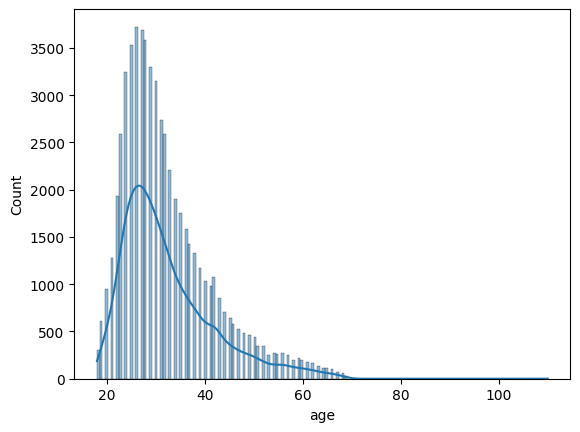

In [81]:
%%time
sns.histplot(data=df, x='age', kde=True)